In [ ]:
!pip install pmdarima
!pip install darts
!pip install yfinance
!pip install SCALECAST
!pip install neuralforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 784.8/784.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 

## Packages

In [ ]:
# General packages
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import itertools
import statsmodels.api as sm

import warnings
warnings.filterwarnings ('ignore')


# Arima
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa. seasonal import seasonal_decompose
import pmdarima as pm

# Prophet
from prophet import Prophet

# Darts
from darts import TimeSeries
from darts.models import ExponentialSmoothing

#TimesNet
from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS, NBEATS, TimesNet
from neuralforecast.losses.numpy import mae, mse

# Multivariate Forcasting
from scalecast.Forecaster import Forecaster
from scalecast.MVForecaster import MVForecaster
from scalecast.multiseries import export_model_summaries
from scalecast import GridGenerator
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

## Data

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, index_col=0)

data_index = []
for i in data.index:
    data_index.append(datetime.strptime(i, '%Y-%m'))
data.index = data_index

data.head()

,Passengers
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Arima

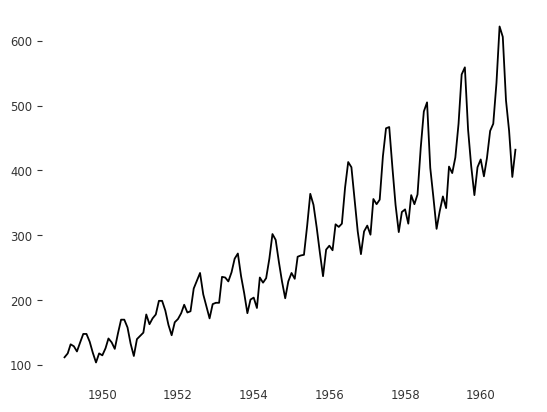

In [ ]:
plt.plot(data.index,data.Passengers)
plt.grid()
plt.show()

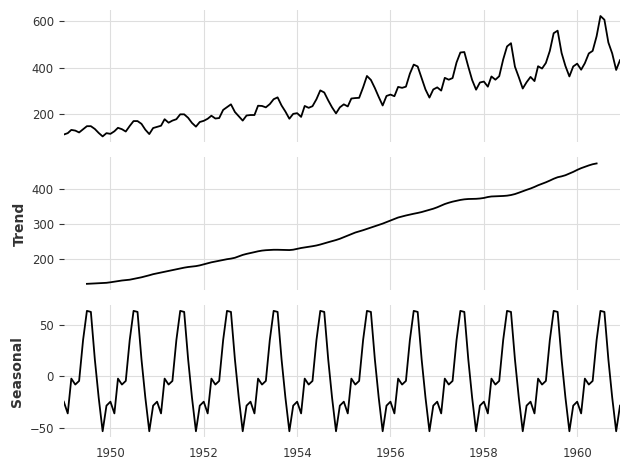

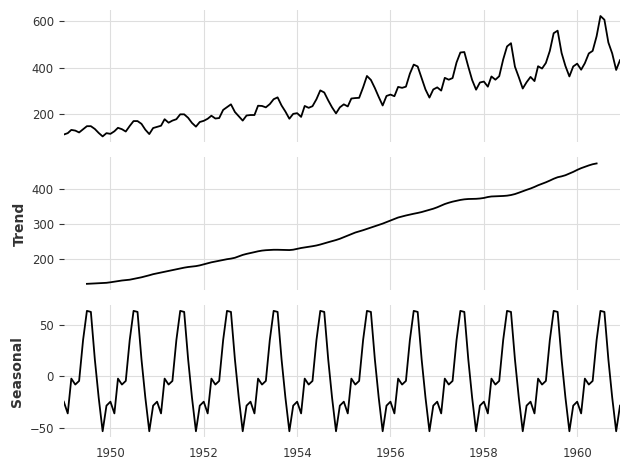

In [ ]:
seasonal_decompose(data,period = 12).plot(resid = False)

In [ ]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.18 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.31 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.35 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.95 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.51 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.12 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.25 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.99 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.51 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=7.36 sec
 ARIMA(0,1,1)(1,1,1)[12]     

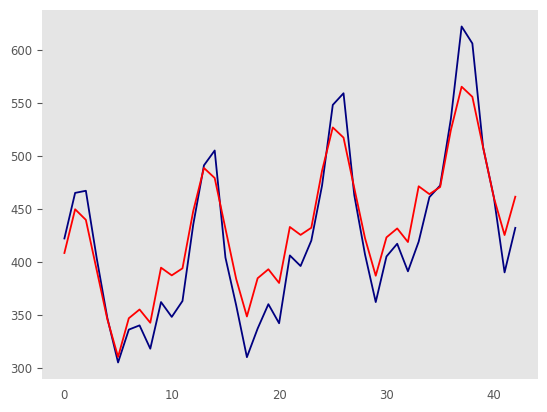

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
plt.style.use('ggplot')

train_test_split = int(round(data.shape[0]* 0.3, 0))
train = data.iloc[:-train_test_split]
test = data.iloc[-train_test_split:]
stepwise_model.fit(train)
future_forecast = stepwise_model.predict(n_periods=train_test_split)

plt.plot(list(range(len(test))) , test.Passengers,color = 'navy')
plt.plot(list(range(len(test))) , future_forecast.tolist(), color = 'red')
plt.grid()
plt.show()

**Check for stationarity:** Most time series models require the data to be stationary. A time series is said to be stationary if its statistical properties such as *mean, variance & covariance* remain constant over time. The formal ways to check for this are plotting the data and do a visual analysis and use a statistical test.

**Visual:** we can use the decomposition method which allows us to separately view seasonality (which could be daily, weekly, annual, etc), trend and random which is the variability in the data set after removing the effects of the seasonality and trend.

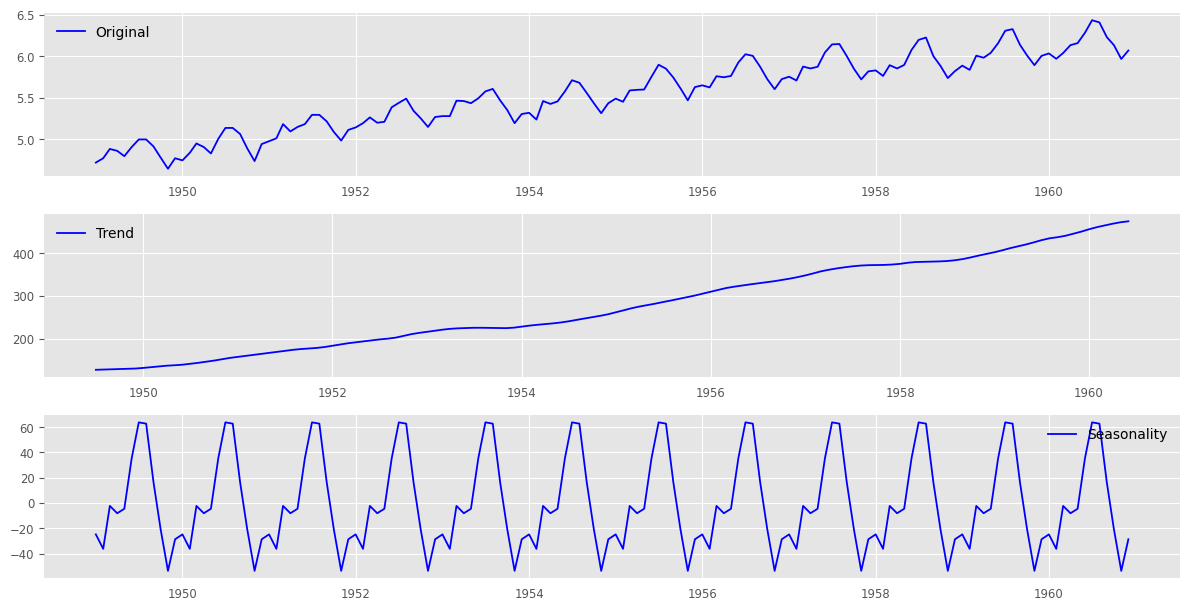

In [ ]:
data.index.names = ['Time']
ts = data.copy()

decomposition = seasonal_decompose(ts,period = 12)
# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt. figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts), label='Original', color="blue")
plt.legend (loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend (loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color="blue")
plt.legend (loc='best')
plt.tight_layout()

* **Statistical test:** To confirm our visual observation on the above plot, we will use the Dickey-Fuller Hypothesis testing.

    * **Null Hypothesis:** The series is not stationary.

    * **Alternate Hypothesis:** The series is stationary.

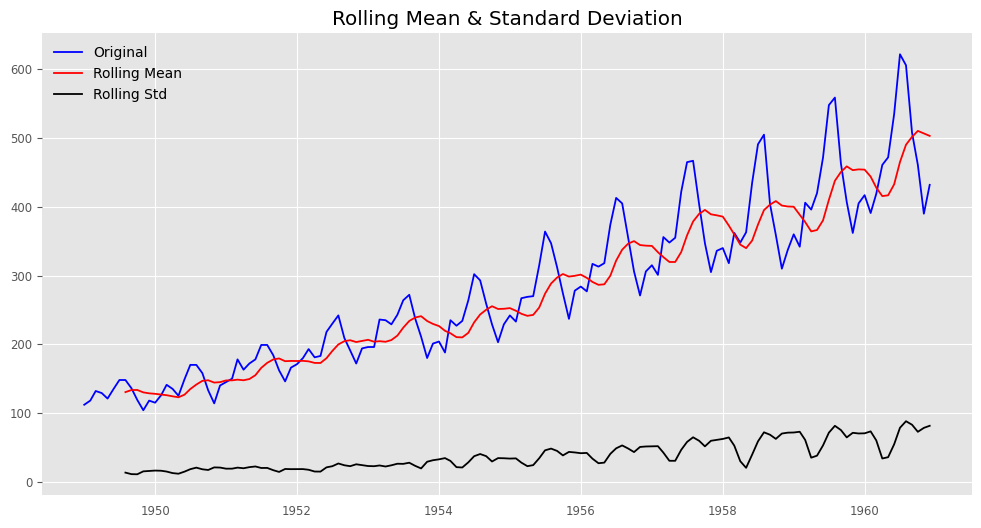

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
# Calculate rolling statistics
rolmean = ts.rolling(window=8, center = False).mean()
rolstd = ts.rolling(window=8, center = False).std()
# Perform the Dickey Fuller Test
dftest = adfuller(ts['Passengers']) # change the value column as required
#Plot rolling statistics:
fig = plt.figure(figsize=(12,6))
orig = plt.plot(ts, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
# Print Dickey-Fuller test results
print ('Results of Dickey-Fuller Test:')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

With the `p-value` **0.99** which is greater than **0.05**, we fail to reject the null hypothesis & it confirms that the series is not stationary.

**Make series stationery & determine the d value:** After the statistical test confirmed that the series is not stationary, the next step is to remove the trend and make the series stationary. One of the most common methods of dealing with removing both the trend and seasonality is differencing and the number of times the differencing was performed to make the series stationary is the `d` value.

In [ ]:
ts_diff = ts.diff(periods = 4).dropna()

**Create ACF and PACF plots & determine the `p` and `q` values:** The Partial Autocorrelation Function (PACF) gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. The Autocorrelation Function gives the correlation of a time series with its own lagged values but without controlling the other lags.

The ACF plot for the AR(p) time series would be strong to a lag of `p` and remain stagnant for subsequent lag values, trailing off at some point as the effect is weakened. The PACF, on the other hand, describes the direct relationship between an observation and its lag. This generally leads to no correlation for lag values beyond `p`.

The ACF for the MA(q) process would show a strong correlation with recent values up to the lag of `q`, then an immediate decline to minimal or no correlation. For the PACF, the plot shows a strong relationship to the lag and then a tailing off to no correlation from the lag onwards. Below is the ACF & PACFplot for our stationary data.

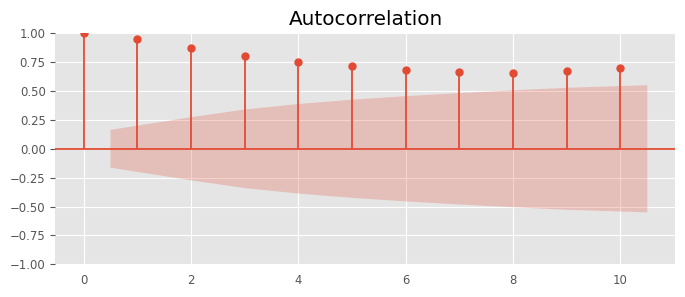

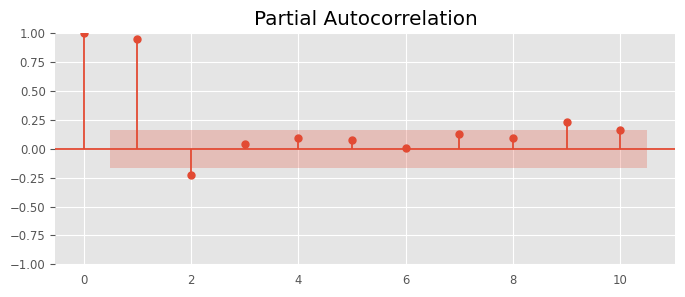

In [ ]:
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(ts, ax=ax, lags=10);
fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(ts, ax=ax, lags=10);

In [ ]:
# Define the p, d and a parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output. aic))

        except:
            continue

ans_df = pd. DataFrame (ans, columns=['pdq', 'pdas', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =2044.4329486427587
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =1887.3336957046115
ARIMA (0, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =1498.2861800947483
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1315.9211929474204
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =1156.2914901508536
ARIMA (0, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =1016.136279733764
ARIMA (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =1103.8641596218804
ARIMA (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =942.1856088449201
ARIMA (0, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =834.3017303458493
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =1118.6259190717344
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =1107.2562043241846
ARIMA (0, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =1014.6452265990006
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =1109.2437994445113
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =1033.6172166729725
ARIMA (0,

pdq         (2, 1, 2)
pdas    (0, 2, 2, 12)
aic        715.156862
Name: 629, dtype: object

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0917      0.071    -15.436      0.000      -1.230      -0.953
ar.L2         -0.9590      0.071    -13.471      0.000      -1.099      -0.819
ma.L1          0.8787      0.108      8.169      0.000       0.668       1.089
ma.L2          0.9106      0.100      9.086      0.000       0.714       1.107
ma.S.L12      -1.6644    228.682     -0.007      0.994    -449.873     446.544
ma.S.L24       0.6642    152.019      0.004      0.997    -297.288     298.616
sigma2        85.7594   1.96e+04      0.004      0.997   -3.83e+04    3.85e+04


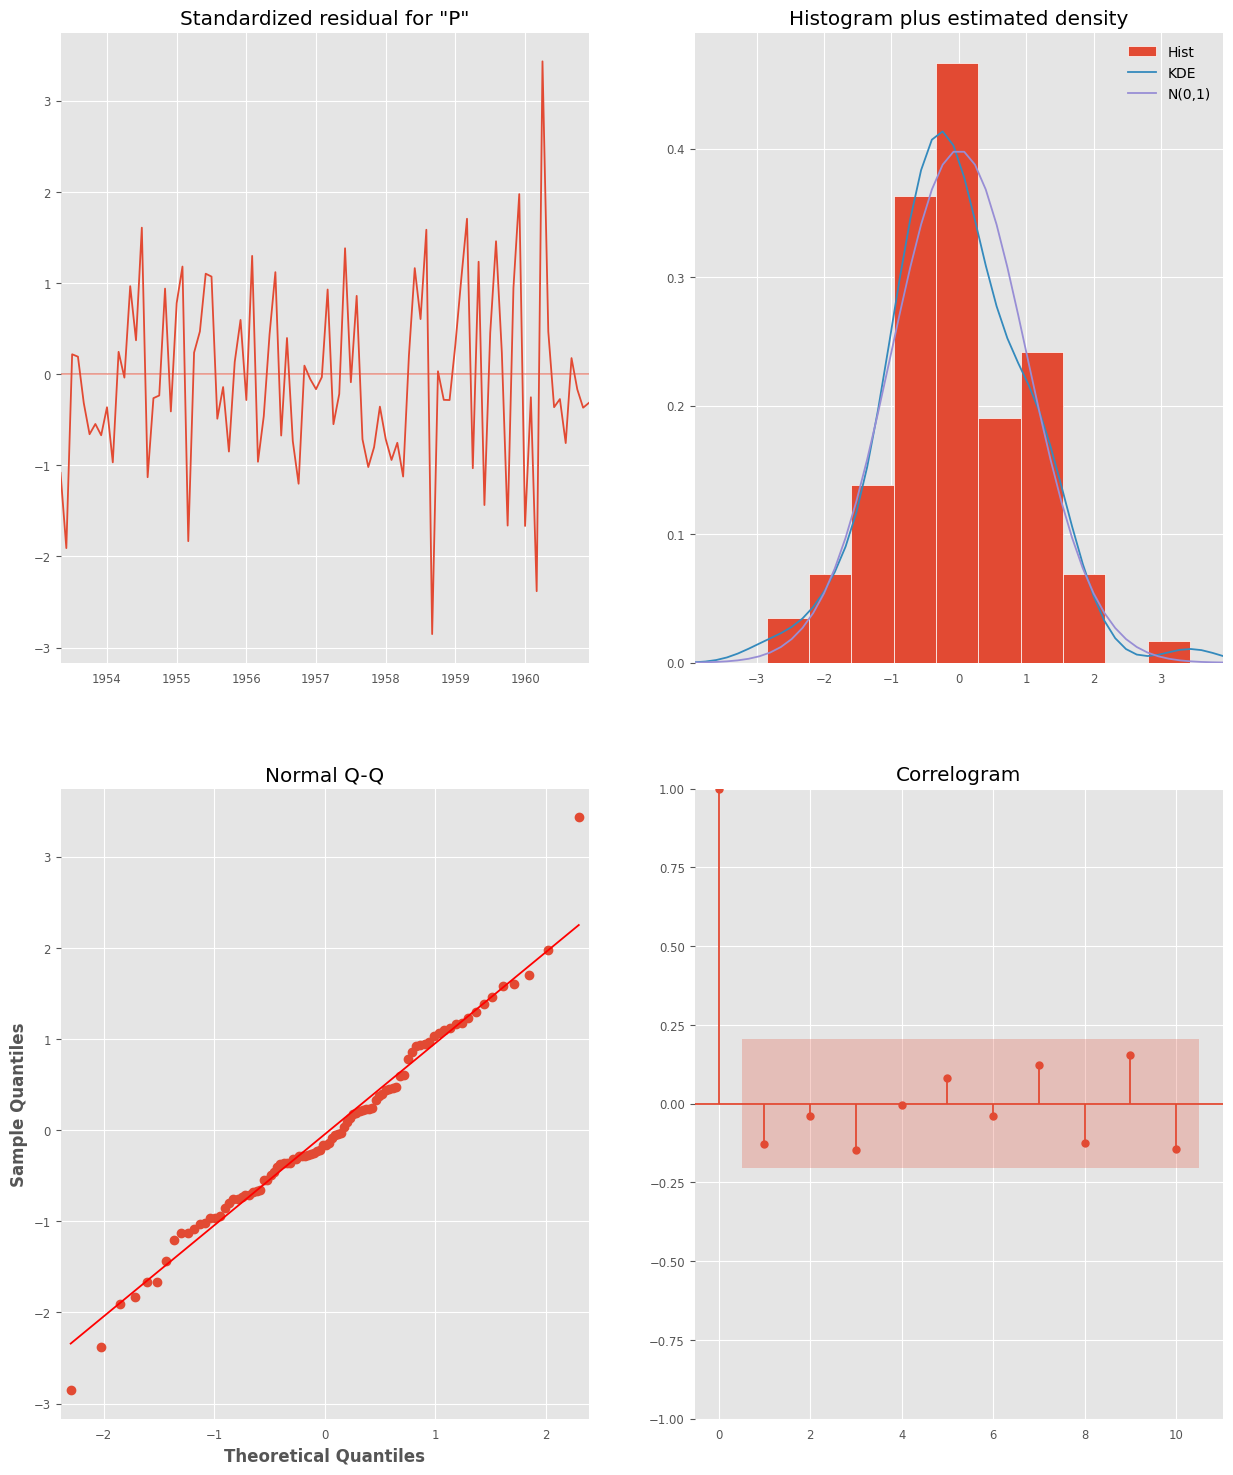

In [ ]:
#fitting the SARIMA model using the parameters choosen using Lower AIC 2
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts,
                                    order=(2,1,2),
                                    seasonal_order=(0,2,2,12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
output = ARIMA_MODEL.fit()
print(output.summary().tables[1])

# Use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Auto ARIMA model:
The advantage of using Auto ARIMA over the ARIMA model is that after data preprocessing step we can skip the next steps & directly fit our model. It uses the AIC (Akaike Information Criterion) & BIC(Bayesian Information Criterion) values generated by trying different combinations of `p`,`q` & `d` values to fit the model.

Auto-ARIMA works by conducting differencing tests to determine the order of differencing, `d`, and then fitting models within ranges of defined `start_p`, `max_p`, `start_q`, `max_q` ranges. If the `seasonal` optional is enabled, auto-ARIMA also seeks to identify the optimal `P` and `Q` hyper- parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, `D`.

**`start_p` : The starting value of `p`, the order (or number of time lags) of the auto-regressive (“AR”) model. Must be a positive integer.**

**`d` : The order of first-differencing.**

**`start_q` : The starting value of `q`, the order of the moving-average (“MA”) model.**

**`max_p` : The maximum value of `p`.**

**`max_d` : The maximum value of `d`, or the maximum number of non-seasonal differences.**

**`max_q` : The maximum value of `q`, inclusive. Must be a positive integer greater than `start_q`.**

**`start_P` : The starting value of `P`, the order of the auto-regressive portion of the seasonal model.**

**`D` : The order of the seasonal differencing.**

**`start_Q` : The starting value of `Q`, the order of the moving-average portion of the seasonal model.**

**`max_P` : The maximum value of `P`, inclusive.**

**`max_D` : The maximum value of `D`.**

**`max_Q` : The maximum value of `Q`, inclusive. Must be a positive integer greater than `start_Q`.**

**`m` : The period for seasonal differencing, `m` refers to the number of periods in each season. For example, `m` is 4 for quarterly data, 12 for monthly data, or 1 for annual (non-seasonal) data.**

**`seasonal` : Whether to fit a seasonal ARIMA.**

**`test` : Type of unit root test to use in order to detect stationarity.**

**`stepwise` : Whether to use the stepwise algorithm outlined in Hyndman and Khandakar (2008) to identify the optimal model parameters. The stepwise algorithm can be significantly faster than fitting all (or a random subset of) hyper-parameter combinations and is less likely to over-fit the model.**

**`suppress_warnings` : Many warnings might be thrown inside of statsmodels. If `suppress_warnings` is True, all of the warnings coming from ARIMA will be squelched.**

**`trace` : Whether to print status on the fits. A value of False will print no debugging information. A value of True will print some. Integer values exceeding 1 will print increasing amounts of debug information at each fit.**

**`error_action` : If unable to fit an ARIMA for whatever reason, this controls the error-handling behavior. Model fits can fail for linear algebra errors, convergence errors, or any number of problems related to stationarity or input data.**

* ‘warn’: Warns when an error is encountered (default)
* ‘raise’: Raises when an error is encountered
* ‘ignore’: Ignores errors (not recommended)
* ‘trace’: Logs the entire error stacktrace and continues the search. This is the best option when trying to determine why a model is failing.

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[12]             : AIC=1412.973, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2057.847, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(0,0,1)(0,0,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(1,0,1)(1,0,0)[12]             : AIC=1157.298, Time=0.82 sec
 ARIMA(1,0,1)(2,0,0)[12]             : AIC=1157.797, Time=0.95 sec
 ARIMA(1,0,1)(1,0,1)[12]             : AIC=1158.174, Time=0.54 sec
 ARIMA(1,0,1)(0,0,1)[12]             : AIC=1312.901, Time=0.29 sec
 ARIMA(1,0,1)(2,0,1)[12]             : AIC=inf, Time=1.53 sec
 ARIMA(0,0,1)(1,0,0)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(2,0,1)(1,0,0)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,0,2)(1,0,0)[12]             : AIC=1159.023, Time=0.57 sec
 ARIMA(0,0,0)(1,0,0)[12]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,2)(1,0,0)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(2,0,0)(1,0,0)[12]             : AIC=inf, Time=0.

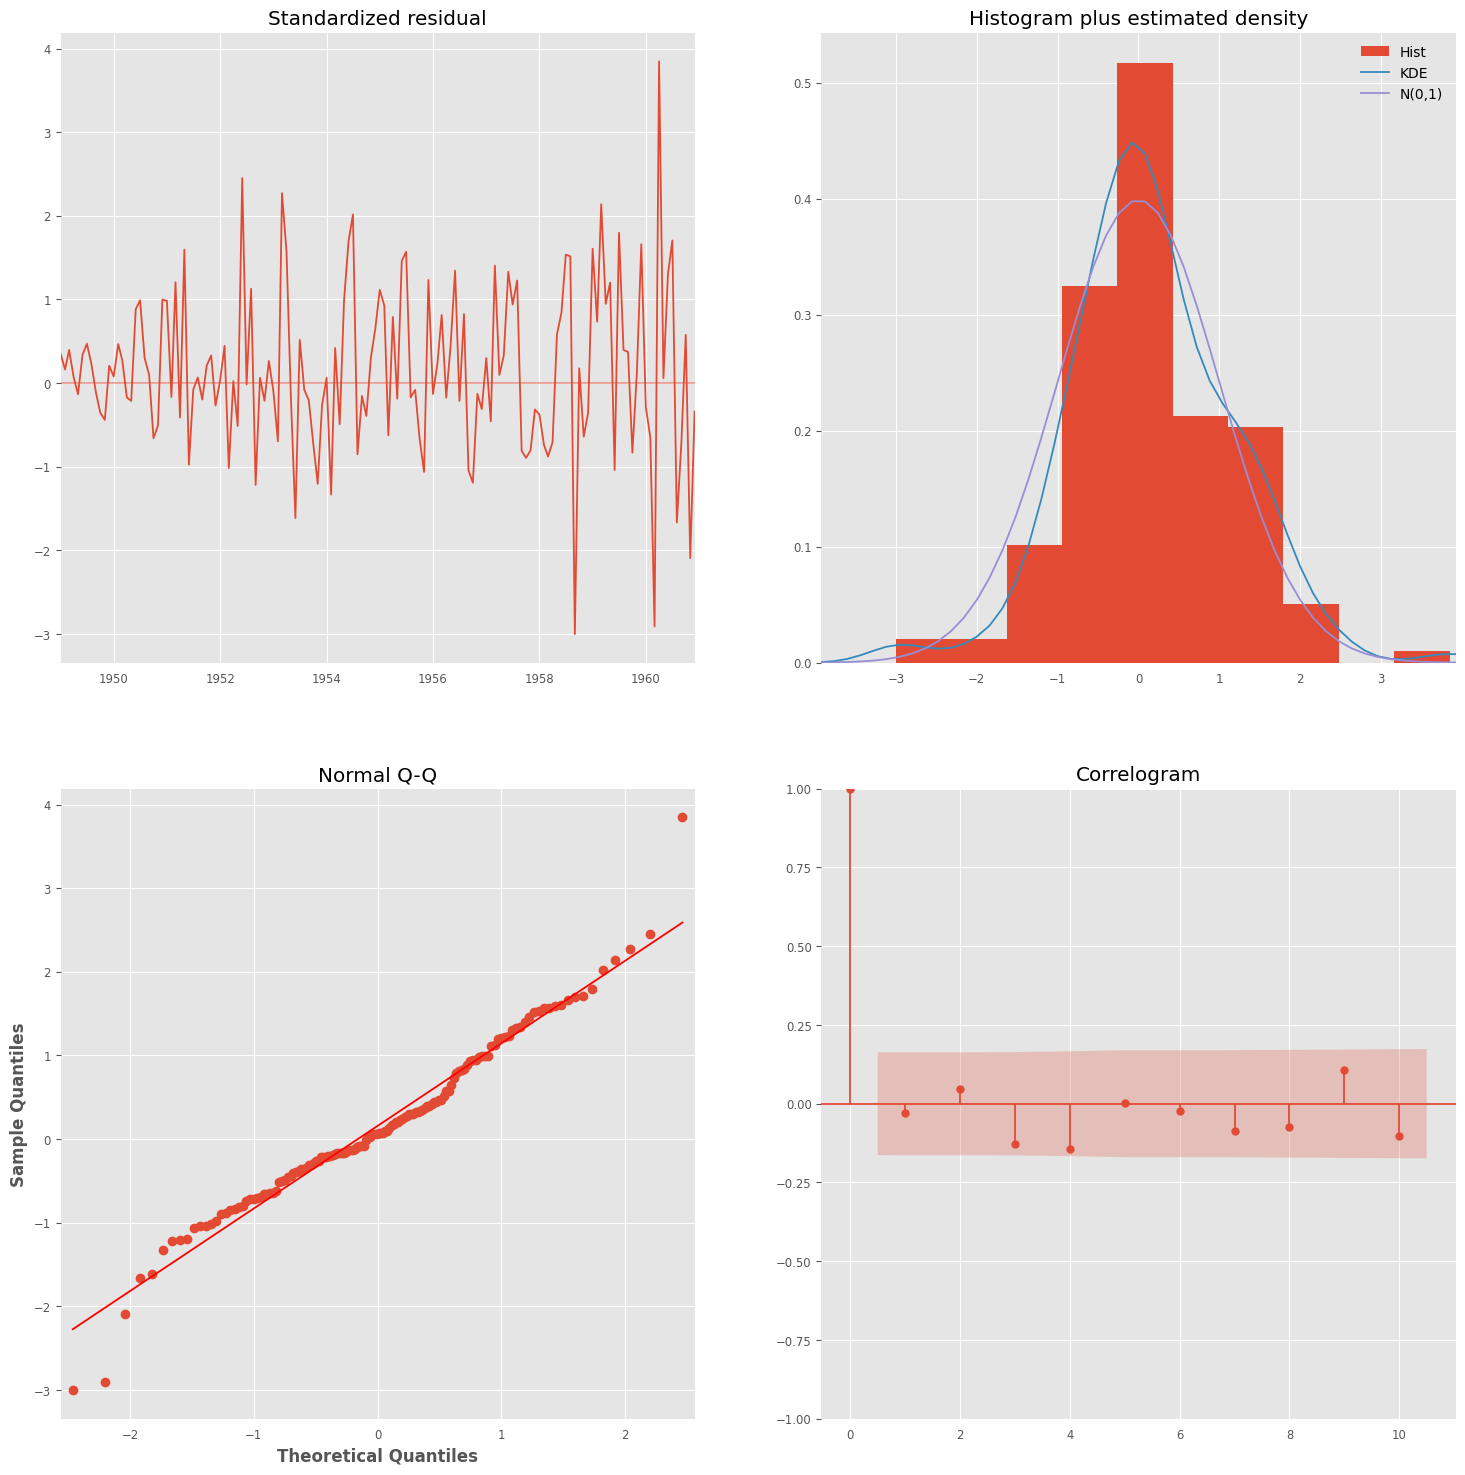

In [ ]:
model = pm.auto_arima(ts, start_p=1, start_q=1,
                        test='adf',          # use adftest to find optimal 'd'
                        max_p=5, max_q=5,    # maximum p and a
                        m=12,                # frequency of series
                        d=0,                 # Let model determine d
                        seasonal = True,     # No Seasonality
                        start_P=0, start_Q=0,
                        D=0,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True, with_intercept=False)

print(model.summary())
model.plot_diagnostics(figsize=(18, 18))
plt.show()

**Histogram plus estimated density plot:** The red KDE line follows closely with the `N(0,1)` line. This is a good indication that the residuals are normally distributed.

**The Q-Q-plot:** Shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with `N(0, 1)`. This is an indication that the residuals are normally distributed.

**The standardize residual plot:** The residuals over time don’t display any obvious seasonality and appear to be white noise.

**The Correlogram plot:** Shows that the time series residuals have low correlation with lagged versions of itself.

----------------------

## Prophet

Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe.

In [ ]:
data['ds'] = data.index
data = data.rename(columns={'Passengers': 'y'})

m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
m.fit(data)
future = m.make_future_dataframe(periods=12)
forecast = m.predict(future)
forecast.head()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe8gd0krp/xb7hgx1g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe8gd0krp/onb92lyf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95657', 'data', 'file=/tmp/tmpe8gd0krp/xb7hgx1g.json', 'init=/tmp/tmpe8gd0krp/onb92lyf.json', 'output', 'file=/tmp/tmpe8gd0krp/prophet_model7tqwdbkb/prophet_model-20231112150216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:02:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:02:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.4038,56.1037,112.6418,107.4038,107.4038,-22.2891,-22.2891,-22.2891,-22.2891,-22.2891,-22.2891,0.0000,0.0000,0.0000,85.1148
1,1949-02-01,109.5629,48.6804,107.9549,109.5629,109.5629,-31.1054,-31.1054,-31.1054,-31.1054,-31.1054,-31.1054,0.0000,0.0000,0.0000,78.4576
2,1949-03-01,111.5131,81.5535,141.1988,111.5131,111.5131,-0.5277,-0.5277,-0.5277,-0.5277,-0.5277,-0.5277,0.0000,0.0000,0.0000,110.9854
3,1949-04-01,113.6722,79.5770,137.3167,113.6722,113.6722,-5.3903,-5.3903,-5.3903,-5.3903,-5.3903,-5.3903,0.0000,0.0000,0.0000,108.2819
4,1949-05-01,115.7616,83.1669,141.1098,115.7616,115.7616,-3.9341,-3.9341,-3.9341,-3.9341,-3.9341,-3.9341,0.0000,0.0000,0.0000,111.8276


In [ ]:
print('-'*100)
print('MAE for prohet model:', round(mae(forecast.trend, data.reset_index(drop=True).y),2))
print('MSE for prohet model:', round(mse(forecast.trend, data.reset_index(drop=True).y),2))
print('-'*100)

----------------------------------------------------------------------------------------------------
MAE for prohet model: 32.9
MSE for prohet model: 1973.0
----------------------------------------------------------------------------------------------------


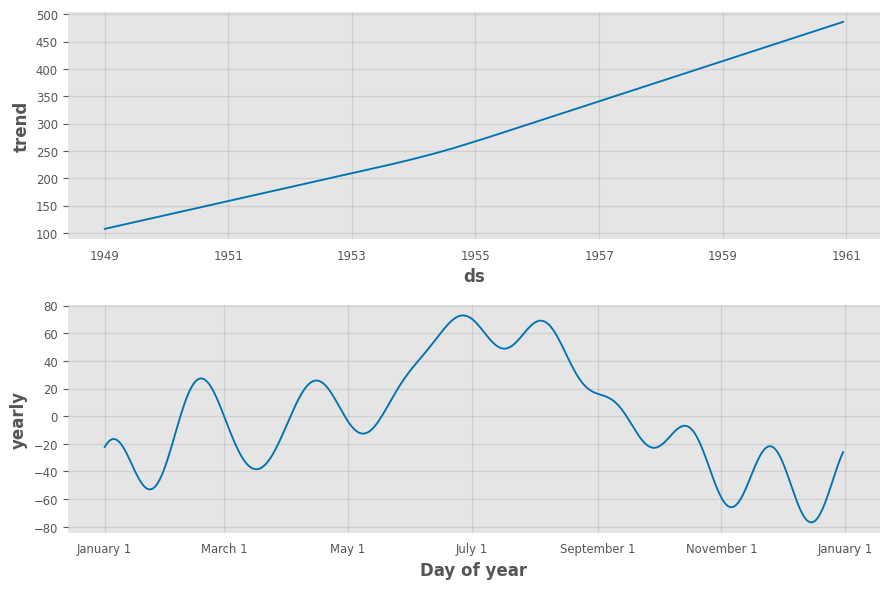

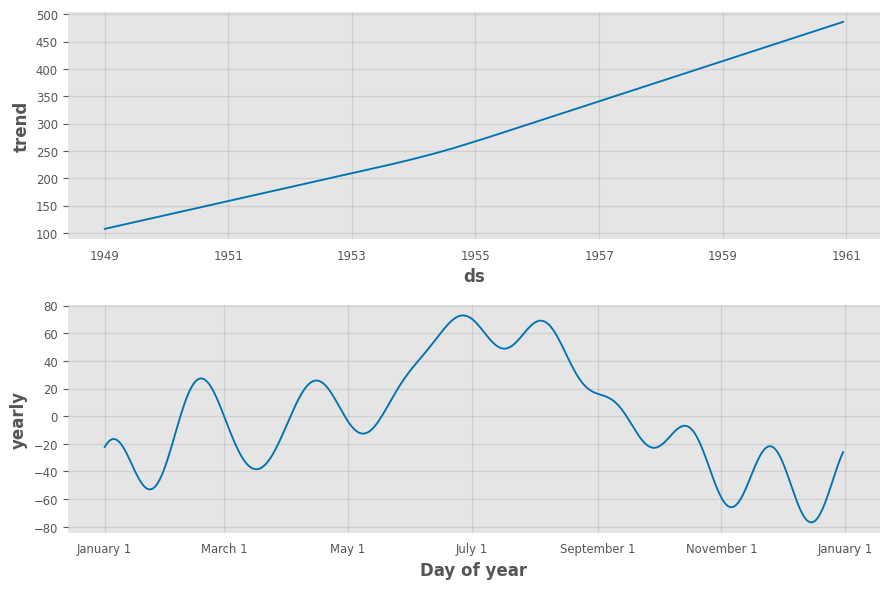

In [ ]:
m.plot_components(forecast)

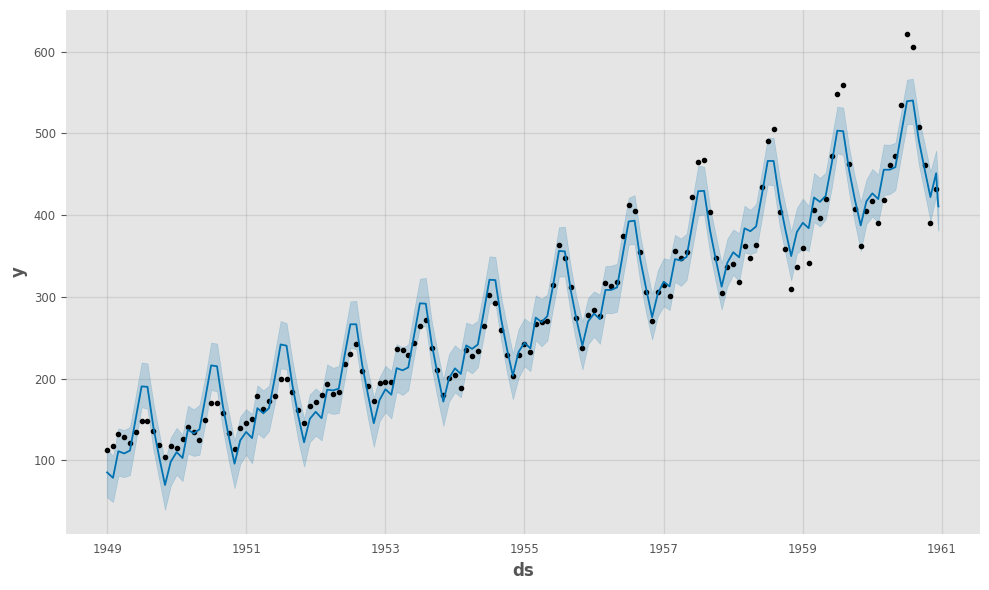

In [ ]:
fig = m.plot(forecast)

## Multivariate Forecasting

### ElasticNet

The main purpose of ElasticNet Regression is to find the coefficients that minimize the sum of error squares by applying a penalty to these coefficients. ElasticNet combines L1 and L2 (Lasso and Ridge) approaches. As a result, it performs a more efficient smoothing process. In another source, it is defined as follows:

Elastic Net first emerged as a result of critique on Lasso, whose variable selection can be too dependent on data and thus unstable. The solution is to combine the penalties of Ridge regression and Lasso to get the best of both worlds.

### MLP

A multilayer perceptron (MLP) is a misnomer for a modern feedforward artificial neural network, consisting of fully connected neurons with a nonlinear kind of activation function, organized in at least three layers, notable for being able to distinguish data that is not linearly separable. It is a misnomer because the original perceptron used a Heaviside step function, instead of a nonlinear kind of activation function(used by modern networks).

Modern feedforward networks are trained using the backpropagation method and are colloquially referred to as the "vanilla" neural networks.

In [ ]:
# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(data, 'ds', 'y')
train, val = series[:-train_test_split], series[-train_test_split:]

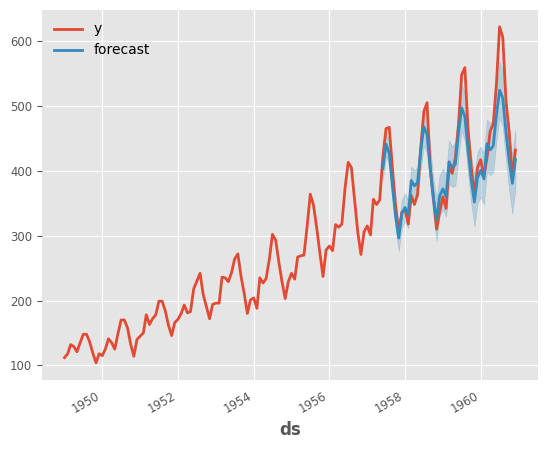

In [ ]:
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)
#Plotting the predictions
series.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [ ]:
models = ('mlr','elasticnet','knn','gbt','xgboost','mlp')
GridGenerator.get_example_grids()
GridGenerator.get_mv_grids()

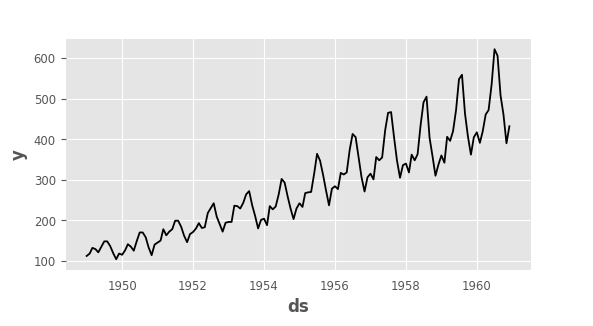

In [ ]:
fig, ax = plt.subplots(figsize=(6,3))
sns.lineplot(
    x='ds',
    y='y',
    data=data,
    ax=ax,
    color='black',
    legend=False
)
ax.figure.legend()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [ ]:
fdata = Forecaster(
    y=data['y'],
    current_dates = data.index,
    test_length = 0.2,
    future_dates = 52,
    validation_length = 4,
    metrics = ['rmse','r2'],
    cis = True
)
fdata

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    N_actuals=144
    ForecastLength=52
    Xvars=[]
    TestLength=28
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    CurrentEstimator=mlr
    GridsFile=Grids
)

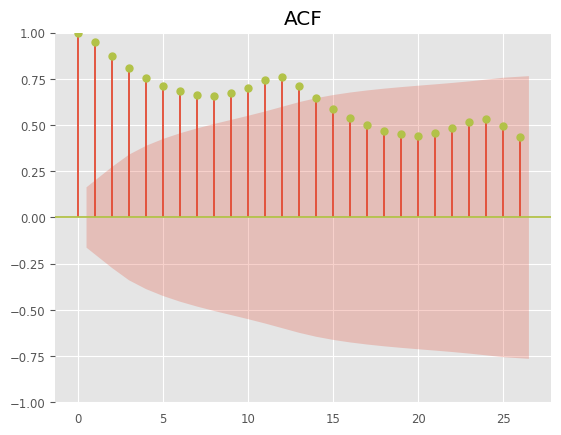

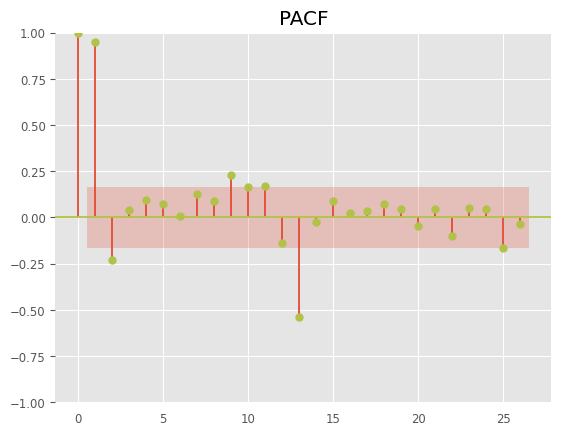

In [ ]:
fdata.plot_acf(
    title='ACF',
    lags=26,
    color='#B2C248'
)
fdata.plot_pacf(
    title='PACF',
    lags=26,
    color='#B2C248',
    method='ywm'
)
plt.show()

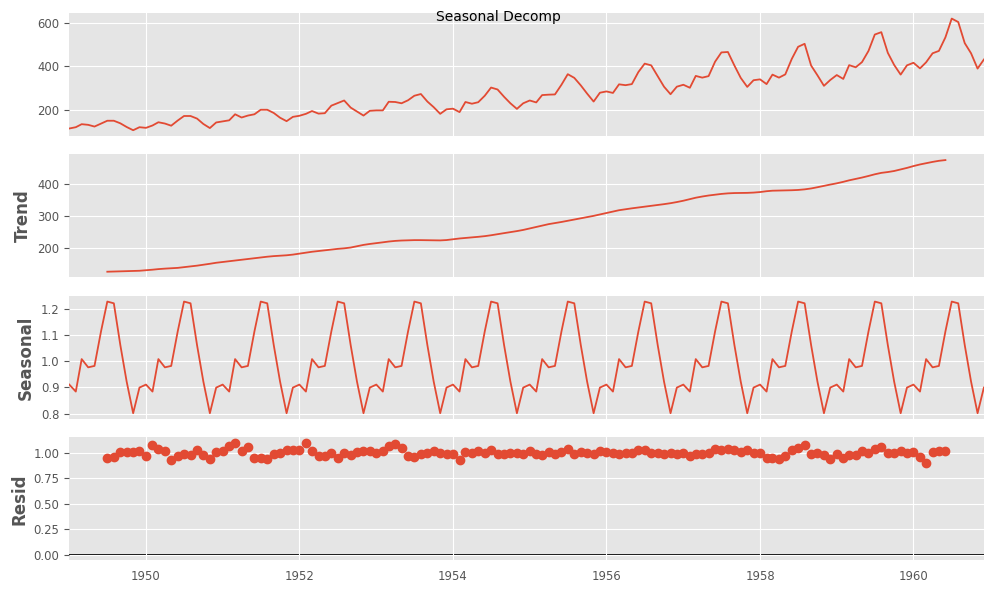

In [ ]:
plt.rc("figure",figsize=(10,6))
fdata.seasonal_decompose(model='mul').plot()
plt.suptitle('Seasonal Decomp',size=10)
plt.show()

In [ ]:
critical_pval = 0.05
print('-'*50)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = fdata.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*50)

--------------------------------------------------
Augmented Dickey-Fuller results:
the test-stat value is: 0.82
the p-value is 0.9919
the series is not stationary
--------------------------------------------------


In [ ]:
fdata.auto_Xvar_select(
    estimator = 'elasticnet',
    monitor = 'ValidationMetricValue',
    irr_cycles = [26], # try irregular semi-annual seaosnality
    cross_validate=True,
    cvkwargs={
        'k':3,
        'test_length':13,
        'space_between_sets':4,
    }
)
print(fdata)

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    N_actuals=144
    ForecastLength=52
    Xvars=['lnt', 'AR1', 'AR2', 'AR3', 'AR4', 'AR5', 'AR6', 'AR7', 'AR8', 'AR9', 'AR10', 'AR11', 'AR12', 'AR13', 'AR14', 'AR15', 'AR16', 'AR17', 'AR18', 'AR19', 'AR20', 'AR21', 'AR22', 'AR23', 'AR24', 'AR25', 'AR26', 'AR27', 'AR28', 'AR29', 'AR30', 'AR31', 'AR32', 'AR33', 'AR34', 'AR35', 'AR36', 'AR37', 'AR38', 'AR39', 'AR40', 'AR41', 'AR42', 'AR43', 'AR44', 'AR45', 'AR46', 'AR47', 'AR48', 'AR49', 'AR50', 'AR51', 'AR52']
    TestLength=28
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    CurrentEstimator=mlr
    GridsFile=Grids
)


In [ ]:
fdata.tune_test_forecast(models,feature_importance=True)
best_model_con_uni = fdata.order_fcsts()[0]
fdata.set_estimator('combo')
fdata.manual_forecast(how='weighted')

PermutationExplainer explainer: 93it [00:17,  1.97it/s]
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of 

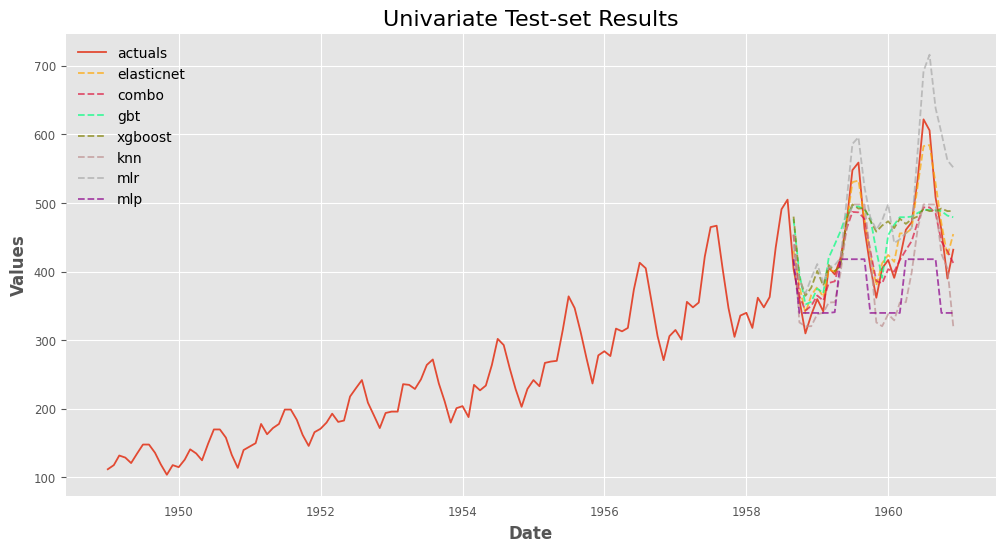

In [ ]:
fdata.plot_test_set(order_by='TestSetRMSE')
plt.title('Univariate Test-set Results',size=16)
plt.show()

In [ ]:
pd.set_option('display.float_format',  '{:.4f}'.format)
ms = export_model_summaries({'airplane data':fdata},determine_best_by='TestSetRMSE')
ms[
    [
        'ModelNickname',
        'Series',
        'TestSetRMSE',
        'TestSetR2',
        'InSampleRMSE',
        'InSampleR2',
        'best_model'
    ]
]

,ModelNickname,Series,TestSetRMSE,TestSetR2,InSampleRMSE,InSampleR2,best_model
0,elasticnet,airplane data,20.6122,0.9311,17.3350,0.9682,True
1,combo,airplane data,43.6013,0.6918,9.7488,0.9899,False
2,gbt,airplane data,55.9439,0.4926,1.2883,0.9998,False
3,xgboost,airplane data,59.8195,0.4198,0.6747,1.0000,False
4,knn,airplane data,60.4633,0.4073,19.8071,0.9585,False
5,mlr,airplane data,73.2336,0.1304,6.2005,0.9959,False
6,mlp,airplane data,85.3479,-0.1810,25.8744,0.9291,False


In [ ]:
print('-'*100)
for series in ms['Series'].unique():
    print('univariate average test MAPE for {}: {:.4f}'.format(series,ms.loc[ms['Series'] == series,'TestSetRMSE'].mean()))
    print('univariate average test R2 for {}: {:.2f}'.format(series,ms.loc[ms['Series'] == series,'TestSetR2'].mean()))
    print('-'*100)

----------------------------------------------------------------------------------------------------
univariate average test MAPE for airplane data: 57.0031
univariate average test R2 for airplane data: 0.41
----------------------------------------------------------------------------------------------------


In [ ]:
fdata1 = fdata.copy()

In [ ]:
mvf = MVForecaster(
    fdata,fdata1,
    names=['airplane','airplane_data'],
    test_length = .2,
    valiation_length = 4,
    cis = True,
    metrics = ['rmse','r2'],
) # init the mvf object
mvf

MVForecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    N_actuals=144
    N_series=2
    SeriesNames=['airplane', 'airplane_data']
    ForecastLength=52
    Xvars=['lnt']
    TestLength=28
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    CurrentEstimator=mlr
    OptimizeOn=mean
    GridsFile=MVGrids
)

In [ ]:
# how to optimize on one series
mvf.set_optimize_on('airplane')
# how to optimize using a weighted avarage
mvf.add_optimizer_func(lambda x: x[0]*.25 + x[1]*.75,'weighted')
mvf.set_optimize_on('weighted')
# how to optimize on the average of both/all series (default)
mvf.set_optimize_on('mean')

In [ ]:
mvf.tune_test_forecast(models)
mvf.set_best_model(determine_best_by='TestSetRMSE')

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

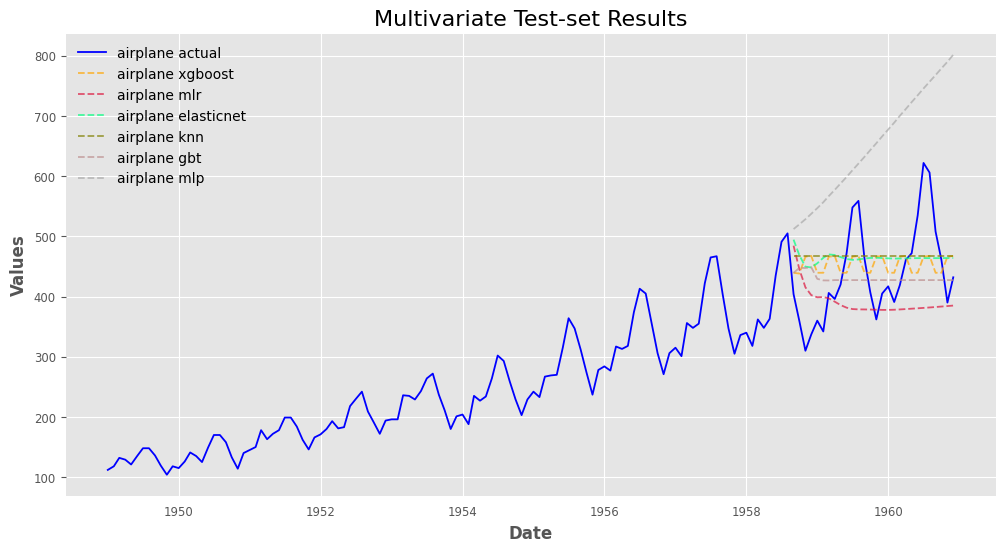

In [ ]:
# not plotting both series at the same time because they have significantly different scales
mvf.plot_test_set(series='airplane',put_best_on_top=True)
plt.title('Multivariate Test-set Results',size=16)
plt.show()

In [ ]:
pd.options.display.max_colwidth = 100
results = mvf.export('model_summaries')
results[
    [
        'ModelNickname',
        'Series',
        'HyperParams',
        'TestSetRMSE',
        'TestSetR2',
        'InSampleRMSE',
        'InSampleR2',
        'Lags'
    ]
]

,ModelNickname,Series,HyperParams,TestSetRMSE,TestSetR2,InSampleRMSE,InSampleR2,Lags
0,xgboost,airplane,"{'n_estimators': 150, 'scale_pos_weight': 5, 'learning_rate': 0.2, 'gamma': 3, 'subsample': 0.8}",79.5930,-0.0271,1.1621,0.9999,3
1,mlr,airplane,{'normalizer': 'scale'},101.4173,-0.6676,29.2283,0.9381,6
2,elasticnet,airplane,"{'alpha': 1.6, 'l1_ratio': 0, 'normalizer': None}",82.4275,-0.1016,29.9882,0.9349,6
3,knn,airplane,{'n_neighbors': 4},83.6318,-0.1340,29.0065,0.9407,1
4,gbt,airplane,"{'max_depth': 3, 'max_features': None}",82.2414,-0.0966,7.5690,0.9959,6
5,mlp,airplane,"{'activation': 'relu', 'hidden_layer_sizes': (25, 25), 'solver': 'lbfgs', 'normalizer': 'minmax'}",228.3956,-7.4577,31.1231,0.9317,1
6,xgboost,airplane_data,"{'n_estimators': 150, 'scale_pos_weight': 5, 'learning_rate': 0.2, 'gamma': 3, 'subsample': 0.8}",79.5930,-0.0271,1.1621,0.9999,3
7,mlr,airplane_data,{'normalizer': 'scale'},101.4173,-0.6676,29.2283,0.9381,6
8,elasticnet,airplane_data,"{'alpha': 1.6, 'l1_ratio': 0, 'normalizer': None}",82.4275,-0.1016,29.9882,0.9349,6
9,knn,airplane_data,{'n_neighbors': 4},83.6318,-0.1340,29.0065,0.9407,1


In [ ]:
estimators = [
    (
        'mlr',
        LinearRegression()
    ),
    (
        'elasticnet',
        ElasticNet(
            **{
                k:v for k,v in (
                    results.loc[
                        results['ModelNickname'] == 'elasticnet',
                        'HyperParams',
                    ].values[0]
                ).items() if k != 'normalizer'
              }
        )
    ),
    (
        'mlp',
        MLPRegressor(
            **{
                k:v for k,v in (
                    results.loc[
                        results['ModelNickname'] == 'mlp',
                        'HyperParams',
                    ].values[0]
                ).items() if k != 'normalizer'
              }
        )
    )
]

final_estimator = KNeighborsRegressor(
    **{
        k:v for k,v in (
            results.loc[
                results['ModelNickname'] == 'knn',
                'HyperParams',
            ].values[0]
        ).items() if k != 'normalizer'
      }
)

In [ ]:
mvf.add_sklearn_estimator(StackingRegressor,'stacking')
mvf.set_estimator('stacking')
mvf.manual_forecast(estimators=estimators,final_estimator=final_estimator,lags=13)

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

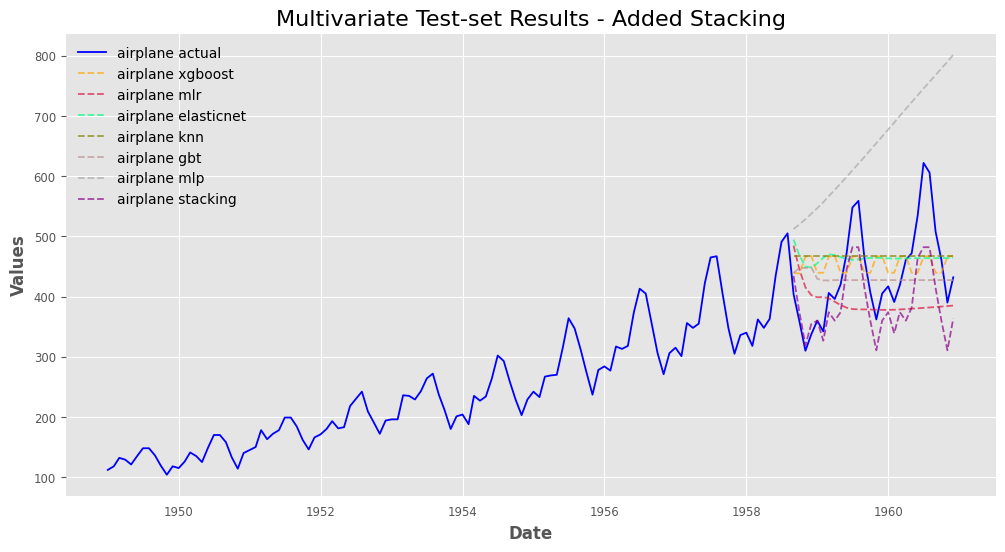

In [ ]:
mvf.plot_test_set(series='airplane',put_best_on_top=True)
plt.title('Multivariate Test-set Results - Added Stacking',size=16)
plt.show()

In [ ]:
mvf.set_best_model(determine_best_by='TestSetRMSE')
results2 = mvf.export('model_summaries')
results2 = results2[
    [
        'ModelNickname',
        'Series',
        'TestSetRMSE',
        'TestSetR2',
        'InSampleRMSE',
        'InSampleR2',
        'Lags',
        'best_model'
    ]
]

results2[results2['Series'] == results2['Series'][0]]

,ModelNickname,Series,TestSetRMSE,TestSetR2,InSampleRMSE,InSampleR2,Lags,best_model
0,stacking,airplane,65.8248,0.2975,12.1292,0.9888,13,True
1,mlr,airplane,101.4173,-0.6676,29.2283,0.9381,6,False
2,elasticnet,airplane,82.4275,-0.1016,29.9882,0.9349,6,False
3,knn,airplane,83.6318,-0.1340,29.0065,0.9407,1,False
4,gbt,airplane,82.2414,-0.0966,7.5690,0.9959,6,False
5,xgboost,airplane,79.5930,-0.0271,1.1621,0.9999,3,False
6,mlp,airplane,228.3956,-7.4577,31.1231,0.9317,1,False


In [ ]:
print('-'*100)
print('multivariate average test MAPE for {}: {:.4f}'.format(results2['Series'][0],results2.loc[results2['Series'] == results2['Series'][0],'TestSetRMSE'].mean()))
print('multivariate average test R2 for {}: {:.2f}'.format(results2['Series'][0],results2.loc[results2['Series'] == results2['Series'][0],'TestSetR2'].mean()))
print('-'*100)

----------------------------------------------------------------------------------------------------
multivariate average test MAPE for airplane: 103.3616
multivariate average test R2 for airplane: -1.17
----------------------------------------------------------------------------------------------------


In [ ]:
best_model_data = (
    results2.loc[results2['Series'] == 'airplane']
    .sort_values('TestSetR2',ascending=False)
    .iloc[0,0]
)

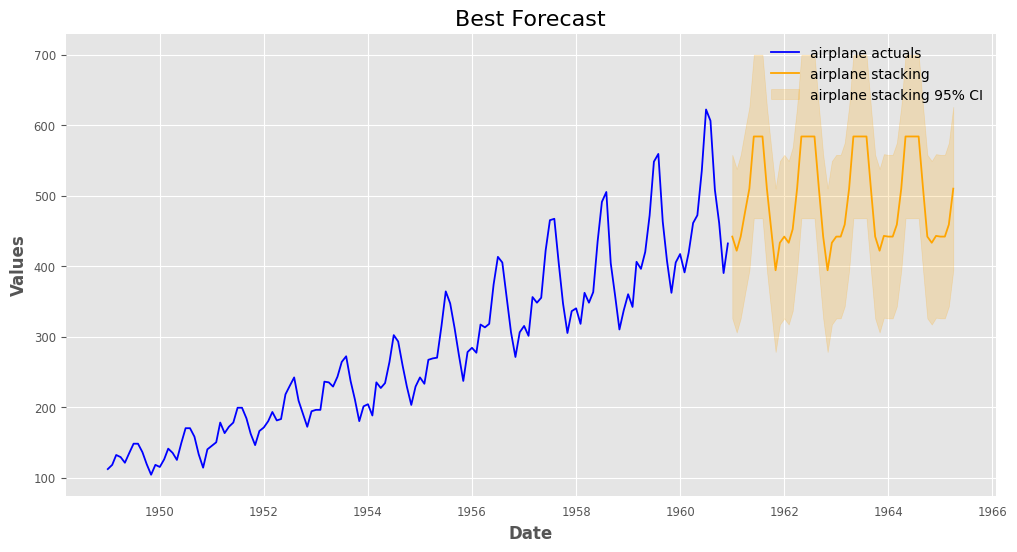

In [ ]:
mvf.plot(series='airplane',models=best_model_data,ci=True)
plt.title('Best Forecast',size=16)
plt.show()

## TimesNet

The TimesNet univariate model tackles the challenge of modeling multiple intraperiod and interperiod temporal variations.

The architecture has the following distinctive features: - An embedding layer that maps the input sequence into a latent space. - Transformation of 1D time seires into 2D tensors, based on periods found by FFT. - A convolutional Inception block that captures temporal variations at different scales and between periods.

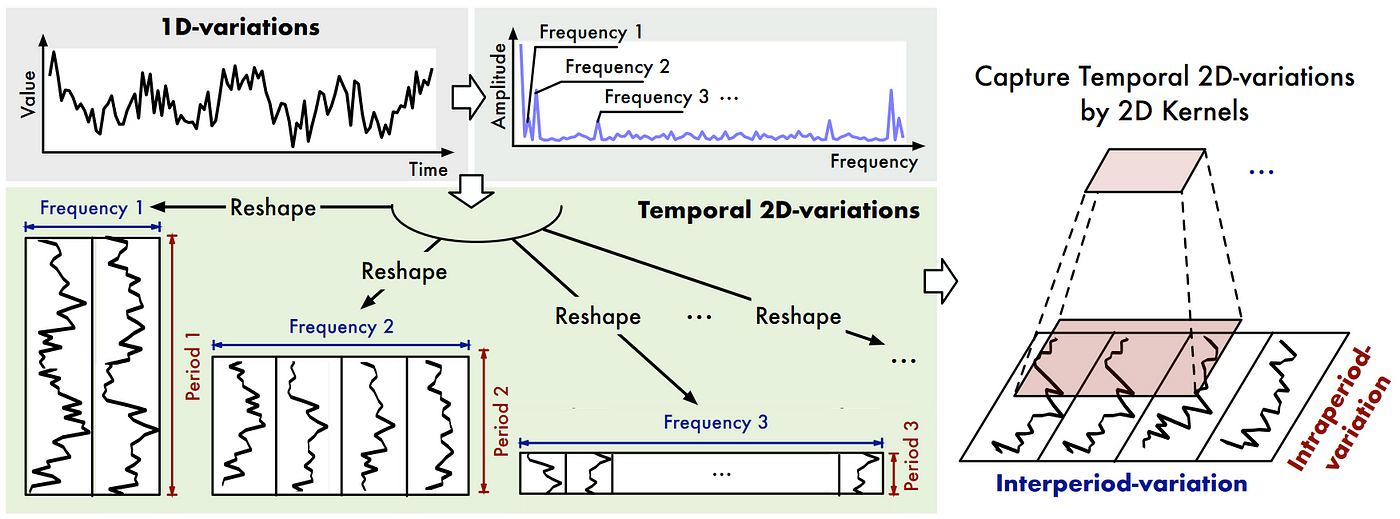

In [ ]:
plt.rcParams["figure.figsize"] = (9,6)

In [ ]:
data['y'] = data['y'] /data['y'].abs().max()
data['unique_id'] = 'Passengers'
data

,y,ds,unique_id
Time,,,
1949-01-01,0.1801,1949-01-01,Passengers
1949-02-01,0.1897,1949-02-01,Passengers
1949-03-01,0.2122,1949-03-01,Passengers
1949-04-01,0.2074,1949-04-01,Passengers
1949-05-01,0.1945,1949-05-01,Passengers
...,...,...,...
1960-08-01,0.9743,1960-08-01,Passengers
1960-09-01,0.8167,1960-09-01,Passengers
1960-10-01,0.7412,1960-10-01,Passengers


In [ ]:
horizon = 9

models = [NHITS(h=horizon,
               input_size=2*horizon,
               max_steps=50),
         NBEATS(h=horizon,
               input_size=2*horizon,
               max_steps=50),
         TimesNet(h=horizon,
                 input_size=2*horizon,
                 max_steps=50)]

nf = NeuralForecast(models=models, freq='M')
preds_df = nf.cross_validation(df=data, step_size=horizon, n_windows=2)

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

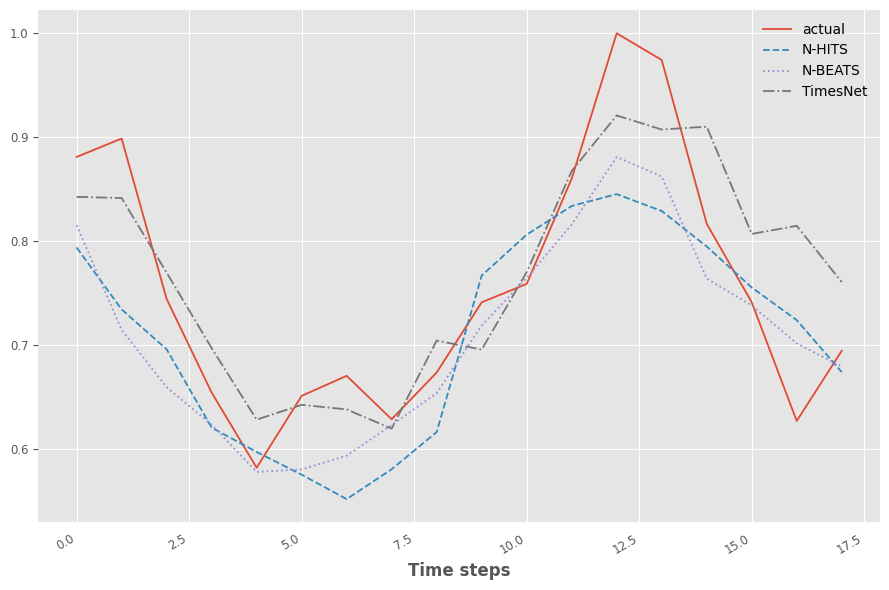

In [ ]:
actual = data.iloc[-horizon*2:].reset_index(drop=True)
actual =  actual['y']

fig, ax = plt.subplots()

ax.plot(actual, label='actual')
ax.plot(preds_df['NHITS'], label='N-HITS', ls='--')
ax.plot(preds_df['NBEATS'], label='N-BEATS', ls=':')
ax.plot(preds_df['TimesNet'], label='TimesNet', ls='-.')

ax.legend(loc='best')
ax.set_xlabel('Time steps')

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
data_timesnet = {'N-HiTS': [mae(preds_df['NHITS'], actual), mse(preds_df['NHITS'], actual)],
       'N-BEATS': [mae(preds_df['NBEATS'], actual), mse(preds_df['NBEATS'], actual)],
       'TimesNet': [mae(preds_df['TimesNet'], actual), mse(preds_df['TimesNet'], actual)]}

metrics_df = pd.DataFrame(data=data_timesnet)
metrics_df.index = ['mae', 'mse']

metrics_df.style.highlight_min(color='lightgreen', axis=1)

,N-HiTS,N-BEATS,TimesNet
mae,0.066762,0.055095,0.050772
mse,0.006828,0.005307,0.004287
